# **Automatidata project**
**Data Project by André Rodrigues**

|Column name|Description|
|-----------|-----------|
|ID|Trip identification number|
|VendorID|A code indicating the TPEP provider that provided the record. <p>**1= Creative Mobile Technologies, <p>LLC; 2= VeriFone Inc.**|
|tpep_pickup_datetime|The date and time when the meter was engaged.|
|tpep_dropoff_datetime|The date and time when the meter was disengaged.|
|Passenger_count |The number of passengers in the vehicle. This is a driver-entered value.|
|Trip_distance |The elapsed trip distance in miles reported by the taximeter.|
|PULocationID |TLC Taxi Zone in which the taximeter was engaged|
|DOLocationID |TLC Taxi Zone in which the taximeter was disengaged|
|RateCodeID |The final rate code in effect at the end of the trip. <p>**1= Standard rate** <p>**2=JFK** <p>**3=Newark** <p>**4=Nassau or Westchester** <p>**5=Negotiated fare** <p>**6=Group ride**|
|Store_and_fwd_flag| This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,”  because the vehicle did not have a connection to the server. <p>**Y= store and forward trip** <p>**N= not a store and forward trip**|
|Payment_type|A numeric code signifying how the passenger paid for the trip.<p>**1= Credit card** <p>**2= Cash**<p>**3= No charge**<p>**4= Dispute**<p>**5= Unknown**<p>**6= Voided trip**|
|Fare_amount| The time-and-distance fare calculated by the meter.|
|Extra| Miscellaneous extras and surcharges. Currently, this only includes the 0.50 dollars and 1 dollars rush hour and overnight charges.|
|MTA_tax|0.50 dollars MTA tax that is automatically triggered based on the metered rate in use.|
|Improvement_surcharge|$0.30 improvement surcharge assessed trips at the flag drop. The  improvement surcharge began being levied in 2015.|
|Tip_amount| This field is automatically populated for credit card tips. Cash tips are not included.|
|Tolls_amount| Total amount of all tolls paid in trip.|
|Total_amount|The total amount charged to passengers. Does not include cash tips.|

# Inspect and analyze data (Part 1)

Welcome to the Automatidata Project!

You have just started as a data professional in a fictional data consulting firm, Automatidata. Their client, the New York City Taxi and Limousine Commission (New York City TLC), has hired the Automatidata team for its reputation in helping their clients develop data-based solutions.

The team is still in the early stages of the project. To get clear insights, New York TLC's data must be analyzed, key variables identified, and the dataset ensured it is ready for analysis.

In [1]:
url_original_data = '/Users/andrerodrigues/Documents/Google Advanced Data Analytics Professional Certificate/Automatidata/Automatidata Files Course 2/home/jovyan/work/2017_Yellow_Taxi_Trip_Data.csv'

In [2]:
# Import libraries and packages (for initial analysis)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset into dataframe

df = pd.read_csv(url_original_data)
print('Done!')

Done!


###  **Inspect the Data** 
Let's inspect summary information about the dataframe.

In [3]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Primary Notes:
1. There are no missing values in any columns. There are 8 float variables, 7 integer variables and 3 object(string) variables. The first column is incorrrectly named (Unnamed:0), when it should be called 'ID'.

2. There seem to be some questionable values like: 
    
     *   a max rate of 99 in the column 'RatecodeID' when the values available are from 1 to 6;
     *  a negative fare in 'fare_amount';
     *  a negative value in 'extra' column when it should be either 0.5 or 1;
     *  a negative value in 'mta_tax' when it should be 0.5;
     *  there is a tip of 200$, which can happen but is way above the mean;
     *  more investigation is needed in the 'tolls-amount' column;
     *  a negative value in 'improvement_surcharge' when it should be 0.3;
     *  a negative value in total_amount;

### **Investigate the variables**

In [6]:
# Sort the data by variable trip_distance from maximum to minimum value
df_sorted1 = df.sort_values(by='trip_distance', ascending = False)
df_sorted1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,63574825,1,07/26/2017 10:26:58 PM,07/26/2017 10:26:58 PM,1,0.00,1,N,162,264,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80
15916,47368116,1,06/29/2017 7:30:30 PM,06/29/2017 7:43:29 PM,1,0.00,1,N,79,148,3,8.50,1.0,0.5,0.00,0.00,0.3,10.30
1350,91619825,2,10/30/2017 8:20:29 AM,10/30/2017 8:20:38 AM,1,0.00,1,N,193,193,1,2.50,0.0,0.5,0.66,0.00,0.3,3.96
246,78660848,1,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,1,0.00,1,N,145,145,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80


In [7]:
# Sort the data by total_amount 
df_sorted2 = df.sort_values(by='total_amount', ascending = False)
df_sorted2.head(15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [8]:
# Let's see the last 15 rows
df_sorted2.tail(15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
22566,19022898,2,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1646,57337183,2,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3
18565,43859760,2,05/22/2017 3:51:20 PM,05/22/2017 3:52:22 PM,1,0.10,1,N,230,163,3,-3.0,0.0,-0.5,0.0,0.0,-0.3,-3.8
314,105454287,2,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,6,0.12,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
5758,833948,2,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,1,0.02,1,N,170,170,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
20317,75926915,2,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,1,0.24,1,N,116,116,4,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8


- By sorting the data by total_amount, we can see some unusual values like negative values in fare_amount as well as very high valeus(like 999 for a 2.6 trip_distance or 450 for a 0 trip_distance) which need further investigation. 

- These fare_amount values influence the total_amount, which end up with very high or negative values. Most of them don't make sense because the trip_distance is equal to zero or relatively low, while others have negative fares.

According to the data dictionary, the payment method was encoded as follows:

1 = Credit card  
2 = Cash  
3 = No charge  
4 = Dispute  
5 = Unknown  
6 = Voided trip

In [9]:
# How many of each payment type are represented in the data?
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [10]:
# What is the average tip for trips paid for with credit card?
avg_tip_credit_card = df[df['payment_type']==1]['tip_amount'].mean()
print('The average tip for trips paid with credit card is: %.4f' % avg_tip_credit_card)

# What is the average tip for trips paid for with cash?
avg_tip_cash = df[df['payment_type']==2]['tip_amount'].mean()
print('The average tip for trips paid with cash is: ', avg_tip_cash)

The average tip for trips paid with credit card is: 2.7298
The average tip for trips paid with cash is:  0.0


In [11]:
# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [12]:
# What is the mean total amount for each vendor?
avg_total_amount_by_vendor =df.groupby('VendorID')['total_amount'].mean()
avg_total_amount_by_vendor

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

In [13]:
# Filter the data for credit card payments only
df_credit_card = df[df['payment_type']==1]

# Filter the credit-card-only data for passenger count only
df_credit_card['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [14]:
# Calculate the average tip amount for each passenger count (credit card payments only)
df_credit_card.groupby(['passenger_count'])[['tip_amount']].mean()

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


# Exploratory data analysis (Part 2)
The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Let's do some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, let's include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

In [15]:
# Import more libraries and packages
import seaborn as sns
import datetime as dt

### **Outliers**

Let's check for outliers on relevant columns such as trip distance and trip duration. Some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** We need to convert our date columns to datetime in order to derive total trip duration.  

In [16]:
# Convert data columns to datetime
df1 = df.copy()
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

In [17]:
# Check if the conversion was successful
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

**trip distance**

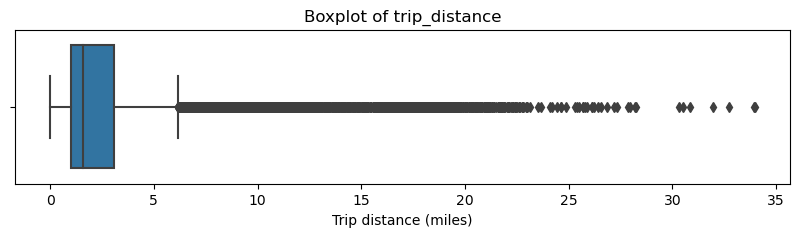

In [18]:
# Create box plot of trip_distance
plt.figure(figsize=(10,2))
sns.boxplot(data=df1, x='trip_distance')
plt.title('Boxplot of trip_distance')
plt.xlabel('Trip distance (miles)')
plt.show()           

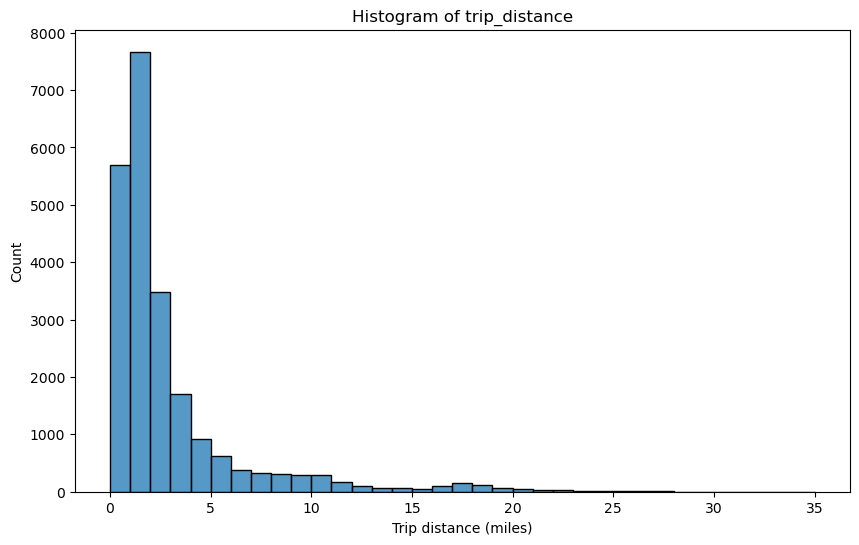

In [19]:
# Create histogram of trip_distance
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='trip_distance', bins=range(0,36,1))
plt.title('Histogram of trip_distance')
plt.xlabel('Trip distance (miles)')
plt.show()

We can create some functions to help make the box plots and histograms. In the case of the histogram, I will only use it once to illustrate, but won't be using so that I don't delimitate the range of the bins initially.

In [20]:
def create_boxplot(feature, data, title,xlabel):
    feature = str(feature)
    plt.figure(figsize=(10,2))
    sns.boxplot(data=data, x=feature) 
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()  

In [21]:
def create_histplot(feature, data, title, xlabel, minrange, maxrange, step):
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x=feature, bins=range(minrange,maxrange,step))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

**total amount**

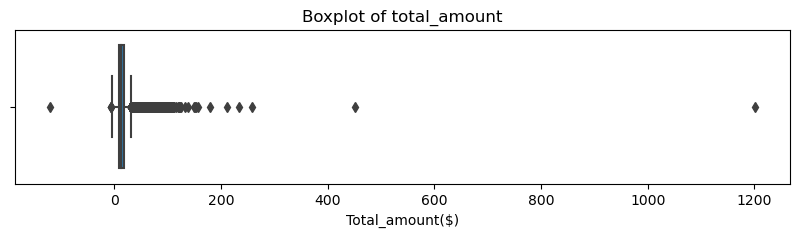

In [22]:
# Create box plot of total_amount
create_boxplot('total_amount', df1, 'Boxplot of total_amount', 'Total_amount($)')

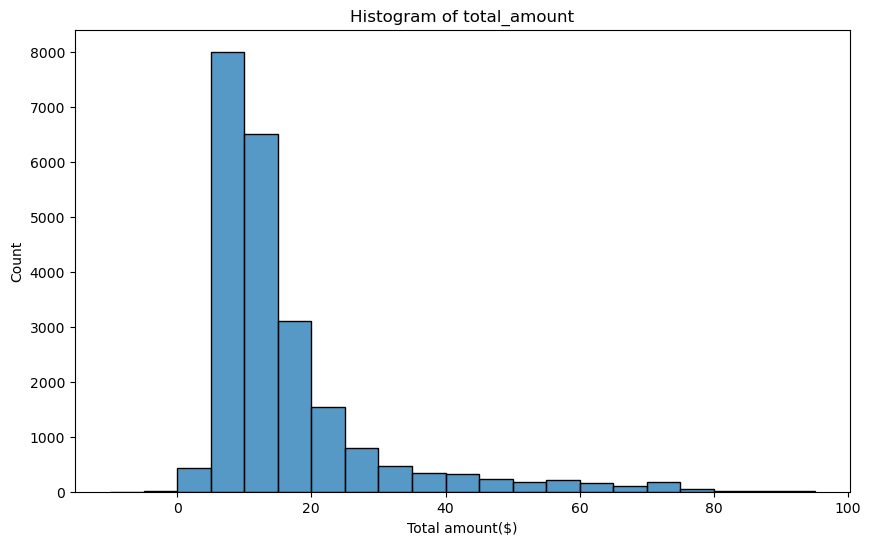

In [23]:
# Create histogram of total_amount
create_histplot('total_amount', df1, 'Histogram of total_amount','Total amount($)',-10,100,5)

**tip amount**

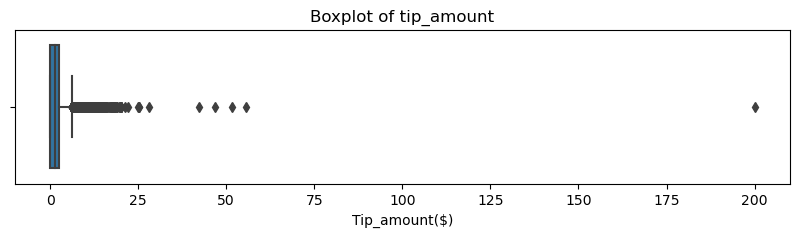

In [24]:
# Create box plot of tip_amount
create_boxplot('tip_amount', df1, 'Boxplot of tip_amount', 'Tip_amount($)')

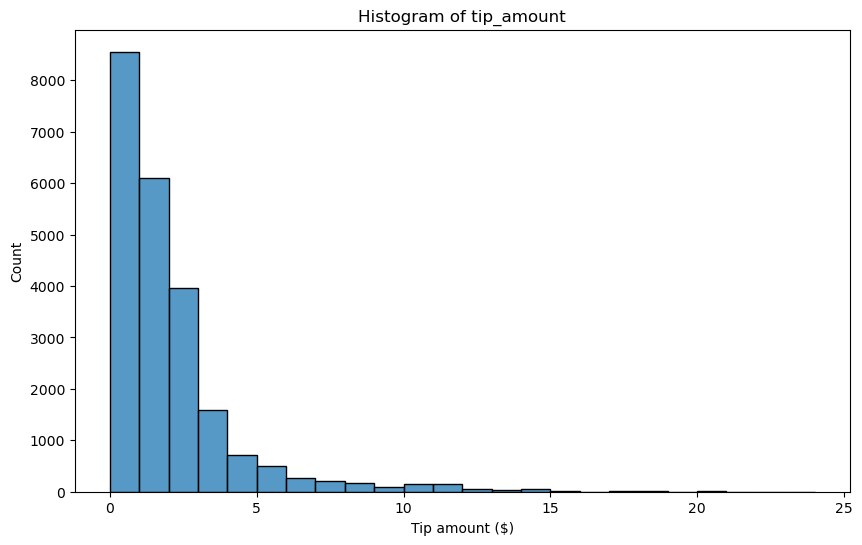

In [25]:
# Create histogram of tip_amount without some outliers
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='tip_amount', bins=range(0,25,1))
plt.title('Histogram of tip_amount')
plt.xlabel('Tip amount ($)')
plt.show()

**tip_amount by vendor**

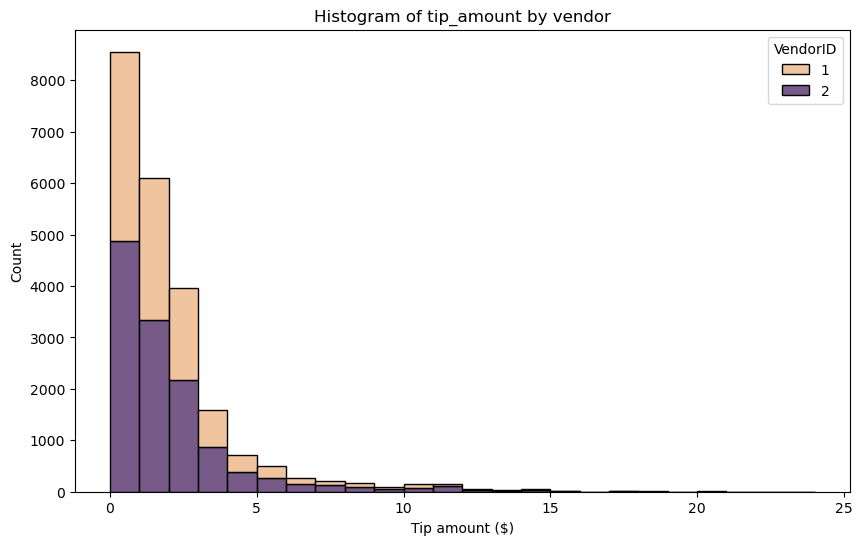

In [26]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='tip_amount', hue='VendorID', bins=range(0,25,1), multiple='stack',palette='flare')
plt.title('Histogram of tip_amount by vendor')
plt.xlabel('Tip amount ($)')
plt.show()

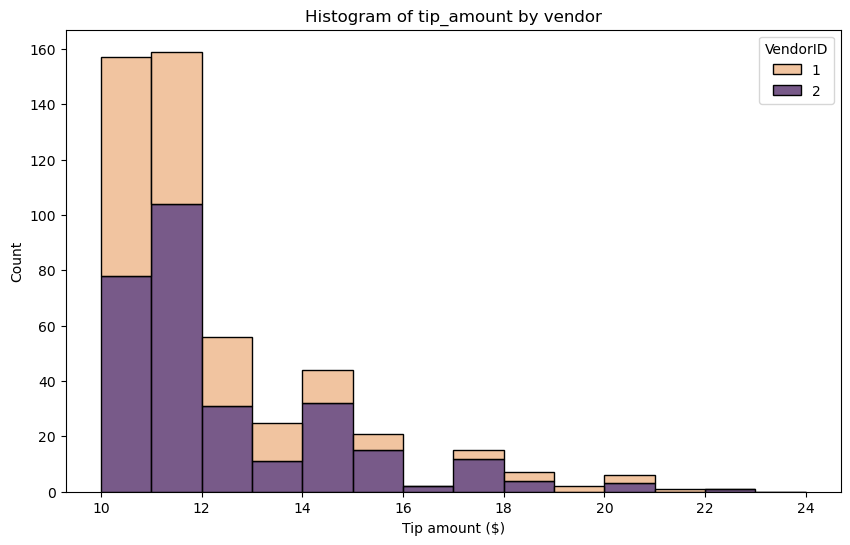

In [27]:
# Create histogram of tip_amount by vendor for tips > $10 
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='tip_amount', hue='VendorID', bins=range(10,25,1), multiple='stack',palette='flare')
plt.title('Histogram of tip_amount by vendor')
plt.xlabel('Tip amount ($)')
plt.show()

**Mean tips by passenger count**

In [28]:
# Examine the unique values in the `passenger_count` column.
df1['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [29]:
# Calculate mean tips by passenger_count
mean_tip_by_number_passengers = df1.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tip_by_number_passengers

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


In [30]:
# Exclude the zero passenger trips
one_plus_passenger = df1['passenger_count']>0
mean_tip_by_passenger_one_plus = df1[one_plus_passenger].groupby(['passenger_count'])[['tip_amount']].mean()
mean_tip_by_passenger_one_plus

,tip_amount
passenger_count,
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


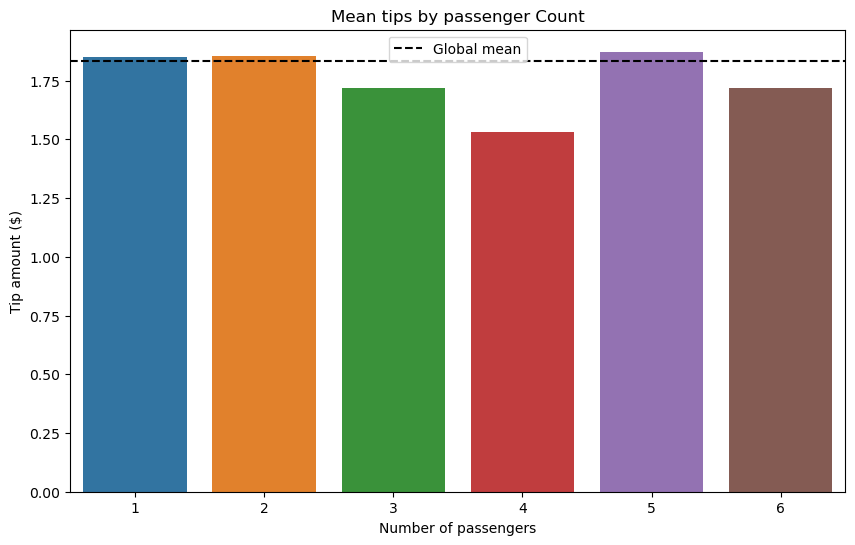

In [31]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize=(10,6))
sns.barplot(data=mean_tip_by_passenger_one_plus,
            x=mean_tip_by_passenger_one_plus.index,
            y='tip_amount')
plt.title('Mean tips by passenger Count')
plt.xlabel('Number of passengers')
plt.ylabel('Tip amount ($)')
plt.axhline(df1['tip_amount'].mean(),ls='--',color='black',label='Global mean')
plt.legend()
plt.show()

**Create month and day columns**

In [32]:
# Create a month column
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()

In [33]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


**Plot total ride count by month**

Begin by calculating total ride count by month.

In [34]:
# Get total number of rides for each month
df1['month'].value_counts()

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

Reorder the results to put the months in calendar order.

In [35]:
# Reorder the monthly ride list so months go in order
month_names = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
monthly_rides = df1['month'].value_counts()
monthly_rides.reindex(month_names)

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [36]:
# Show the index
monthly_rides.index

Index(['March', 'October', 'April', 'May', 'January', 'June', 'December',
       'November', 'February', 'September', 'August', 'July'],
      dtype='object', name='month')

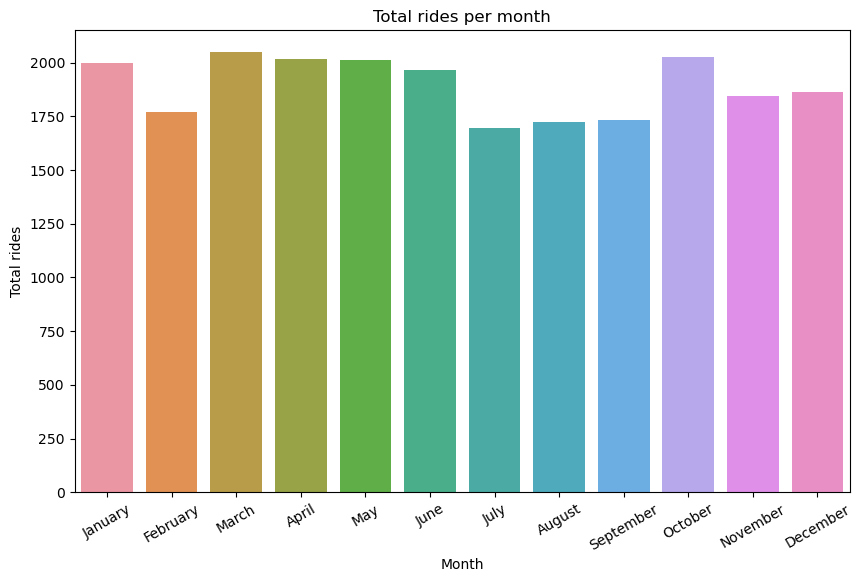

In [37]:
# Create a bar plot of total rides per month
plt.figure(figsize=(10,6))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, order=month_names)
plt.title('Total rides per month')
plt.xlabel('Month')
plt.ylabel('Total rides')
plt.xticks(rotation=30)
ax.set_xticklabels(month_names)
plt.show()

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [38]:
# Repeat the above process, this time for rides by day
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_rides = df1['day'].value_counts()
daily_rides.reindex(day_order)

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

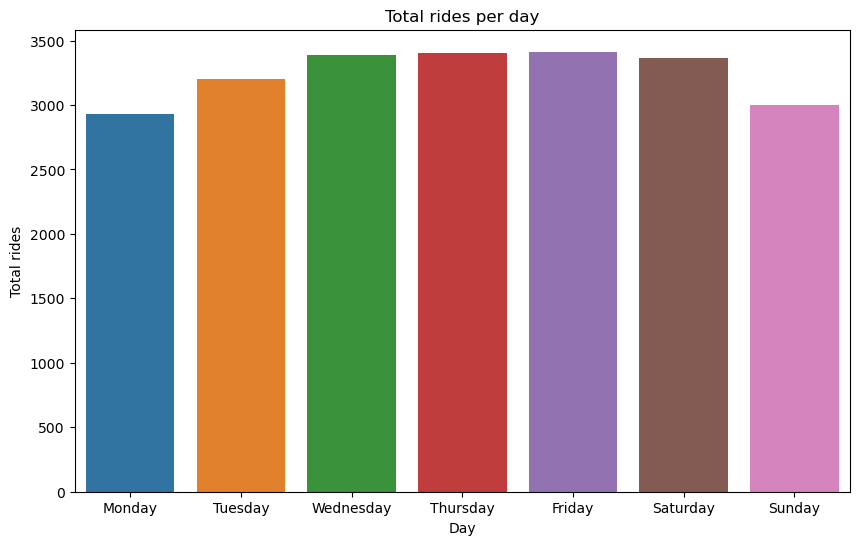

In [39]:
# Create bar plot for ride count by day
plt.figure(figsize=(10,6))
ax = sns.barplot(x=daily_rides.index, y=daily_rides,order=day_order)
plt.title('Total rides per day')
plt.xlabel('Day')
plt.ylabel('Total rides')
ax.set_xticklabels(day_order)
plt.show()

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [40]:
# Repeat the process, this time for total revenue by day
revenue_by_day = df1.groupby('day')[['total_amount']].sum()
revenue_by_day.reindex(day_order)

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


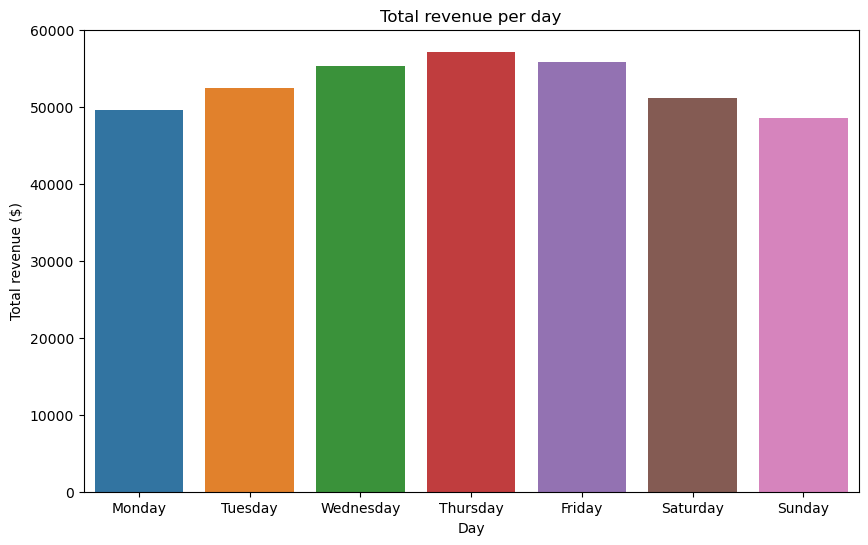

In [41]:
# Create bar plot of total revenue by day
plt.figure(figsize=(10,6))
ax = sns.barplot(x=revenue_by_day.index, y=revenue_by_day['total_amount'],order=day_order)
plt.title('Total revenue per day')
plt.xlabel('Day')
plt.ylabel('Total revenue ($)')
ax.set_xticklabels(day_order)
plt.show()

**Plot total revenue by month**

In [42]:
# Repeat the process, this time for total revenue by month
revenue_by_month = df1.groupby('month')[['total_amount']].sum()
revenue_by_month.reindex(month_names)

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


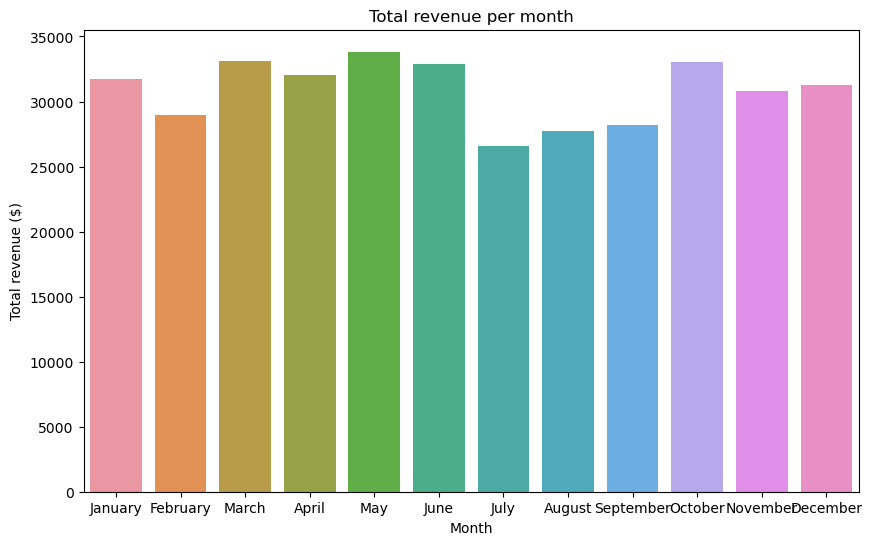

In [43]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(10,6))
ax = sns.barplot(x=revenue_by_month.index, y=revenue_by_month['total_amount'],order=month_names)
plt.title('Total revenue per month')
plt.xlabel('Month')
plt.ylabel('Total revenue ($)')
ax.set_xticklabels(month_names)
plt.show()

**Plot mean trip distance by drop-off location**

In [44]:
# Get number of unique drop-off location IDs
df1['DOLocationID'].nunique()

216

In [45]:
# Calculate the mean trip distance for each drop-off location
average_distance_by_DO_Location = df1.groupby('DOLocationID')[['trip_distance']].mean()


# Sort the results in descending order by mean trip distance
average_distance_by_DO_Location = average_distance_by_DO_Location.sort_values('trip_distance', ascending=False)
average_distance_by_DO_Location

,trip_distance
DOLocationID,
23,24.275000
29,21.650000
210,20.500000
11,17.945000
51,17.310000
...,...
137,1.818852
234,1.727806
237,1.555494


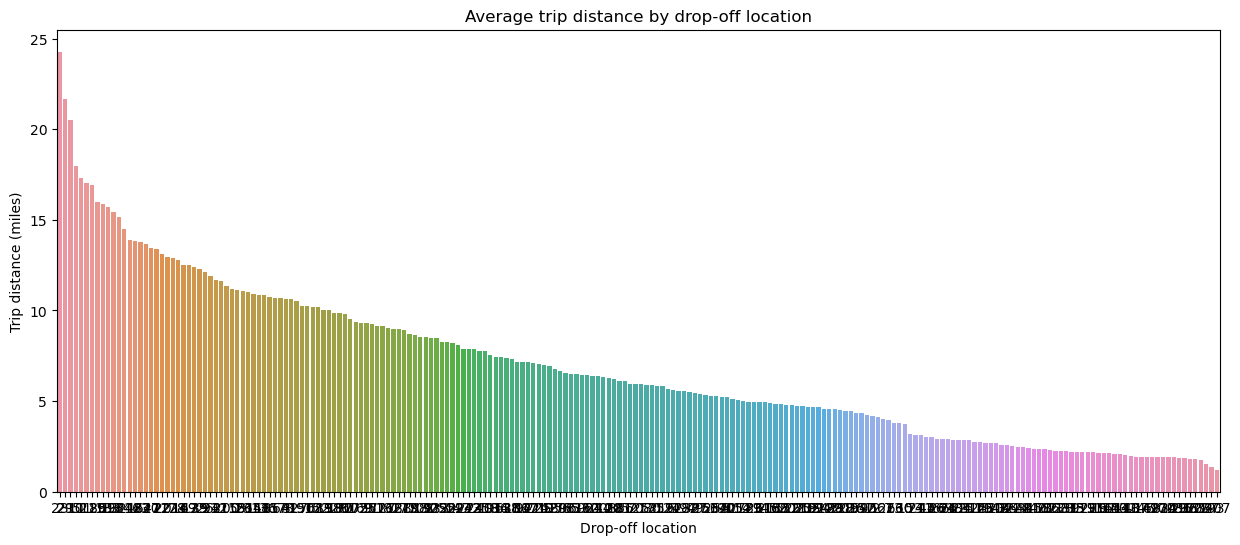

In [46]:
# Create a bar plot of mean trip distances by drop-off location in descending order by distance
plt.figure(figsize=(15,6))
ax = sns.barplot(x=average_distance_by_DO_Location.index, 
                 y=average_distance_by_DO_Location['trip_distance'],
                order=average_distance_by_DO_Location.index)
plt.title('Average trip distance by drop-off location')
plt.xlabel('Drop-off location')
plt.ylabel('Trip distance (miles)')
plt.show()

# Statistical Analysis (Part 3)

The current project for the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. A follow-up email from Luana includes your specific assignment: to conduct an A/B test. 

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.

## **Conduct an A/B test**

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [47]:
from scipy import stats

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



Descriptive statistics are useful because they let you quickly explore and understand large amounts of data. In this case, computing descriptive statistics helps you quickly compare the average total fare amount among different payment types.


In [48]:
df1.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,Friday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2049,3413
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,NaN,NaN
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,NaN,NaN
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,NaN,NaN
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,NaN,NaN
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,NaN,NaN
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,NaN,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,NaN,NaN


You are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

In [49]:
# Average fare amount for each payment type
average_fare_amount = df1.groupby('payment_type')[['fare_amount']].mean()
average_fare_amount

,fare_amount
payment_type,
1,13.429748
2,12.213546
3,12.186116
4,9.913043


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, we will conduct a hypothesis test.


### Hypothesis testing

Before we conduct our hypothesis test, let's consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. Consider our hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.



Our goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



**Note:** For the purpose of this exercise, our hypothesis test is the main component of your A/B test. 

We choose 5% as the significance level and proceed with a two-sample t-test.

In [50]:
# Compute the fare amount only for credit card payments 
credit_card_fare = df1[df1['payment_type']==1]['fare_amount']
credit_card_fare

0        13.0
1        16.0
2         6.5
3        20.5
5         9.0
         ... 
22692    19.0
22693     7.5
22695    52.0
22697    10.5
22698    11.0
Name: fare_amount, Length: 15265, dtype: float64

In [51]:
# Compute the fare amount only for cash payments 
cash_fare = df1[df1['payment_type']==2]['fare_amount']
cash_fare

4        16.5
8         9.0
18        5.0
20        6.5
27        5.5
         ... 
22673     5.0
22675     7.5
22688     4.0
22694     4.0
22696     4.5
Name: fare_amount, Length: 7267, dtype: float64

In [52]:
stats.ttest_ind(a=credit_card_fare,
                b=cash_fare,
                equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

The p-value is way below 0.05 (5% significance level), which implies that the absolute difference between the two mean fare amounts with different payment types is higly unlekely due to chance. Therefore, since the p-value is less than the significance level, we can conclude that there is a statistically significant difference between the means, SO we REJECT the null hypothesis H0.

1.   The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers. 

2.   This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa. 

# Build a multiple linear regression model (Part 4)

The NYC Taxi and Limousine Commission (New York City TLC) wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. 

In this activity, we will build a multiple linear regression model. Multiple linear regression help estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Import the packages needed for building linear regression models.

In [53]:
# Imports
# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [54]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df1.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
month                    0
day                      0
dtype: int64

In [55]:
print('Shape of the dataset:', df1.shape)
print('Shape of the dataset after dropping duplicates:',df1.drop_duplicates().shape)

Shape of the dataset: (22699, 20)
Shape of the dataset after dropping duplicates: (22699, 20)


### Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [56]:
# Create `duration` column
df1['duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df1[['tpep_pickup_datetime','tpep_dropoff_datetime','duration']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,duration
0,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667
1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000
2,2017-12-15 07:26:56,2017-12-15 07:34:08,7.200000
3,2017-05-07 13:17:59,2017-05-07 13:48:14,30.250000
4,2017-04-15 23:32:20,2017-04-15 23:49:03,16.716667


### Outliers
Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be(based on what we previsouly seen):
* `trip_distance`
* `fare_amount`
* `duration`



### Box plots

We have already seen the outliers for `trip_distance`, but we still need to plot a box plot for : `fare_amount`, `duration`. We had prevously seen strange values for the fare amount!

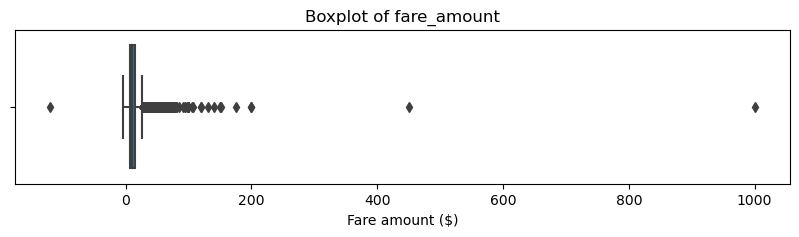

In [57]:
# Box plot for fare_amount
plt.figure(figsize=(10,2))
sns.boxplot(data=df1, x='fare_amount')
plt.title('Boxplot of fare_amount')
plt.xlabel('Fare amount ($)')
plt.show()

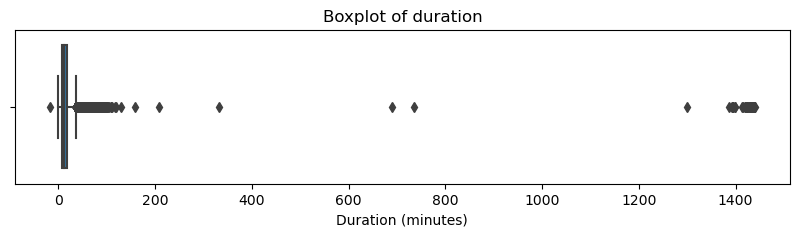

In [58]:
# Box plot for duration
plt.figure(figsize=(10,2))
sns.boxplot(data=df1, x='duration')
plt.title('Boxplot of duration')
plt.xlabel('Duration (minutes)')
plt.show()

Conclusions
1. All variables contain outliers, with some extreme ones.

2. The values in the `trip_distance` column seem the most 'normal', except for the ones where they are null (0).

3. Distances, fares, and durations of 0 (or negative values) don't make sense. Therefore we need to deal with them.

### Imputations

#### `trip_distance` outliers

We know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, let's sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [59]:
# Are trip distances of 0 bad data or very short trips rounded down?
sort_distance = df1.sort_values('trip_distance')
sort_distance[['trip_distance','total_amount','duration']].head(10)

,trip_distance,total_amount,duration
22026,0.0,11.3,0.000000
795,0.0,8.8,0.000000
6908,0.0,20.3,0.066667
13561,0.0,32.3,0.383333
12238,0.0,3.3,0.233333
6878,0.0,99.3,0.050000
14372,0.0,5.3,4.466667
20638,0.0,4.3,0.000000
920,0.0,3.8,0.566667
16263,0.0,3.8,0.350000


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [60]:
# Number of rides where trip distance was zero
df1[df1['trip_distance']==0].shape[0]

148

#### `fare_amount` outliers

In [61]:
# Let's see some descriptive statistic for fare_amount
df1['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [62]:
sum(df1['fare_amount']<0)

14

In [63]:
# Impute values less than $0 with 0
df1.loc[df1['fare_amount']<0, 'fare_amount'] = 0
df1['fare_amount'].min()

0.0

Now let's impute the maximum value as `Q3 + (6 * IQR)`.

In [64]:
def outlier_upper_limit(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df1.loc[df1[col]<0, col] = 0 
        
        # Calculate upper threshold
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        upper_thresh = q3 + (iqr_factor * iqr)
        print(col)
        print('Q3: ',q3)
        print('Upper Threshold: ', upper_thresh)
        
        # Reassign values > threshold to threshold
        df1.loc[df1[col]> upper_thresh, col] = upper_thresh
        print(df1[col].describe())
        print()

#### `duration` outliers


In [65]:
# Call .describe() for duration outliers
df1['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [66]:
# We can simultaneously impute a 0 for any negative values and a limit for the high outliers
# In this case, for both fare_amount and duration columns
outlier_upper_limit(['fare_amount','duration'],6)

fare_amount
Q3:  14.5
Upper Threshold:  62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

duration
Q3:  18.383333333333333
Upper Threshold:  88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |-----|---| ----   |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Let's begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [67]:
# Create `pickup_dropoff` column
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)
df1[['PULocationID','DOLocationID','pickup_dropoff']].head()

,PULocationID,DOLocationID,pickup_dropoff
0,100,231,100 231
1,186,43,186 43
2,262,236,262 236
3,188,97,188 97
4,4,112,4 112


Now, let's use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [68]:
grouped = df1.groupby('pickup_dropoff')[['trip_distance']].mean()
grouped.head()

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [69]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [70]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df1['mean_distance'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

# Confirm that it worked
df1[['pickup_dropoff','mean_distance']].head()


,pickup_dropoff,mean_distance
0,100 231,3.521667
1,186 43,3.108889
2,262 236,0.881429
3,188 97,3.700000
4,4 112,4.435000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [71]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped2 = df1.groupby('pickup_dropoff')[['duration']].mean()
grouped2_dict = grouped2.to_dict()
grouped2_dict = grouped2_dict['duration']

df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped2_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100)&(df1['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [72]:
# Create 'rush_hour' col
df1['rush_hour'] = df1['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df1.loc[df1['day'].isin(['Saturday','Sunday']), 'rush_hour'] = 0

In [73]:
df1['rush_hour']

0         0
1        14
2         7
3         0
4         0
         ..
22694    17
22695     0
22696    14
22697     0
22698    13
Name: rush_hour, Length: 22699, dtype: int32

In [74]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] <=10:
        val = 1
    elif 16 <= hour['rush_hour'] <= 20:
        val = 1
    else:
        val = 0
    return val

In [75]:
# Apply the `rush_hourizer()` function to the new column
df1.loc[(df1['day']!='Saturday')&(df1['day']!='Sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1)
sum(df1['rush_hour'] == 1)

8475

### Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

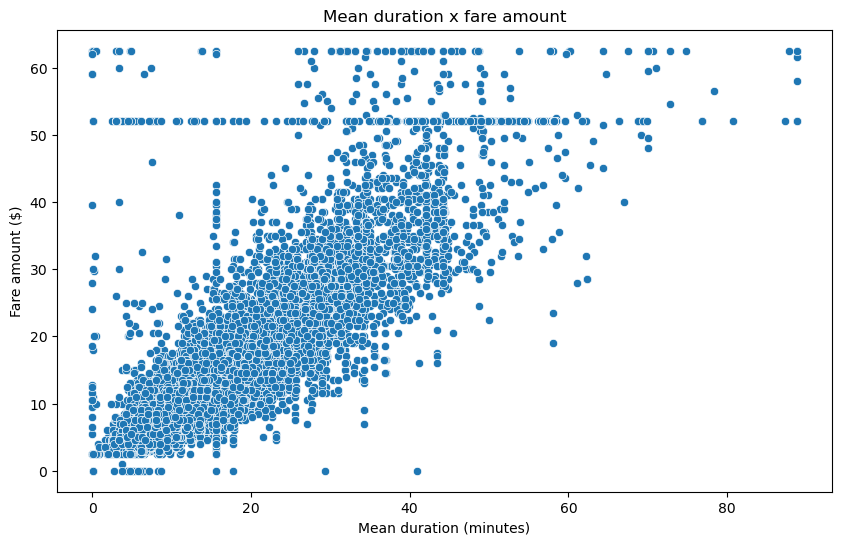

In [76]:
# Create a scatterplot to visualize the relationship between variables of interest
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='mean_duration',y='fare_amount')
plt.title('Mean duration x fare amount')
plt.xlabel('Mean duration (minutes)')
plt.ylabel('Fare amount ($)')
plt.show()

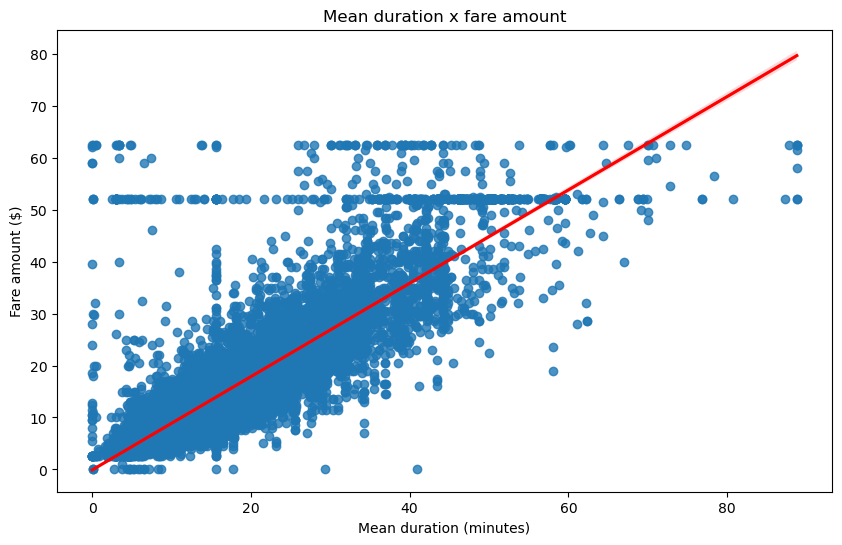

In [77]:
plt.figure(figsize=(10,6))
sns.regplot(data=df1, x='mean_duration',y='fare_amount',line_kws={'color':'red'})
plt.title('Mean duration x fare amount')
plt.xlabel('Mean duration (minutes)')
plt.ylabel('Fare amount ($)')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

We know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [78]:
df1[df1['fare_amount']>50][['fare_amount']].value_counts()

fare_amount
52.0           514
62.5            84
59.0             9
50.5             9
57.5             8
51.0             7
60.0             6
51.5             6
55.0             6
53.0             4
52.5             4
56.0             3
55.5             3
61.0             3
62.0             3
56.5             3
57.0             2
58.5             2
59.5             2
54.0             2
61.5             2
54.7             1
58.0             1
54.5             1
Name: count, dtype: int64

Examine the first 20 of these trips.

In [79]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df1[df1['fare_amount']==52].head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,March,Sunday,36.800000,236 132,19.211667,40.500000,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,June,Saturday,66.850000,132 163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,November,Saturday,0.966667,132 132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,December,Wednesday,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,September,Sunday,29.483333,132 234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,February,Tuesday,39.833333,132 48,18.761905,58.246032,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,June,Monday,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,August,Thursday,45.450000,132 48,18.761905,58.246032,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,September,Tuesday,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,April,Sunday,71.583333,132 148,17.994286,46.340476,0


From the first 20 trips, we notice:
* `RatecodeID`is always 2
* `mta_tax`is always 0.5 
* It seems that almost all of the trips either begin or end at location 132

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of \\$5.76 and \\$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.


The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

### Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [81]:
df2 = df1.copy()
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

/Users/andrerodrigues/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


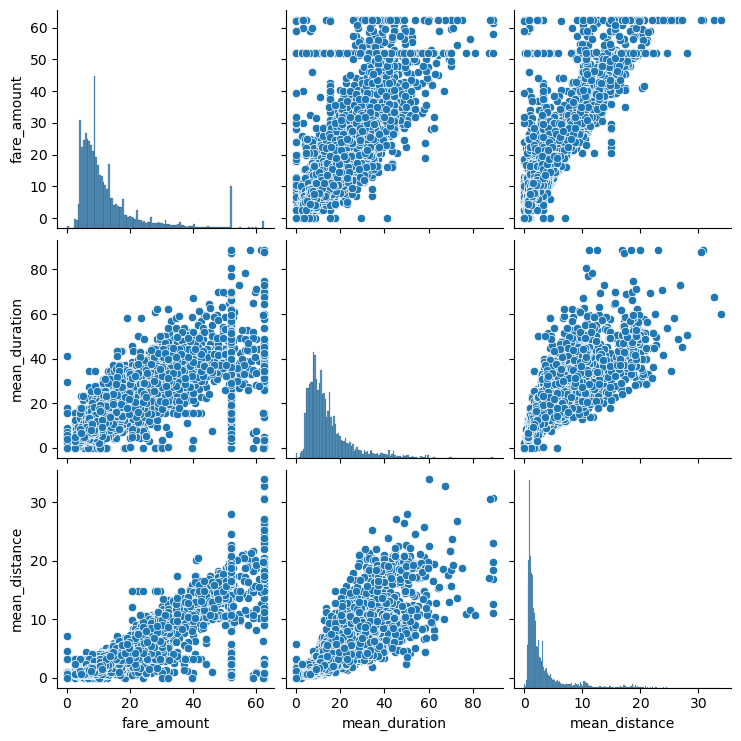

In [82]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount','mean_duration','mean_distance']])

These variables all show linear correlation with each other. Let's investigate this further.

### Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

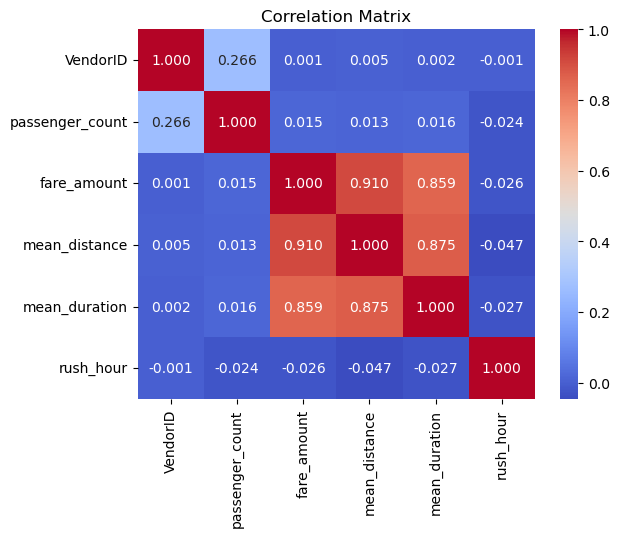

In [83]:
# Correlation matrix to help determine most correlated variables
correlation_matrix = df2.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.3f',)
plt.title('Correlation Matrix')
plt.show()

`fare_amount` is highly correlated with `mean_distance` and `mean_duration` . `mean_distance` and `mean_duration` also have high correlation between them.

The other variables don't seem to correlate.

### Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [84]:
# Remove the target column from the features
X = df2.copy()
X = X.drop(columns='fare_amount')

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Pre-process data


Dummy encode categorical variables

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   mean_distance    22699 non-null  float64
 3   mean_duration    22699 non-null  float64
 4   rush_hour        22699 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 886.8 KB


In [86]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [87]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

print('Training test size: ', X_train.shape , y_train.shape )
print("Testing set shape:", X_test.shape, y_test.shape)

Training test size:  (18159, 5) (18159, 1)
Testing set shape: (4540, 5) (4540, 1)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [88]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.77153979  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.29610943  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.77153979 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.77153979 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.29610943 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.77153979  0.89286563]]


### Fit the model

Instantiate your model and fit it to the training data.

In [89]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [90]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled,y_train)
print('Coefficient of determination: ', r_sq)

y_pred_train = lr.predict(X_train_scaled)
print('R^2: ', r2_score(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))


Coefficient of determination:  0.839866631223281
R^2:  0.839866631223281
MAE:  2.18623856553289
MSE:  17.887144535024103
RMSE:  4.229319630274366


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [91]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [92]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination: ', r_sq_test)

y_pred_test = lr.predict(X_test_scaled)
print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination:  0.8682469790456719
R^2:  0.8682469790456719
MAE:  2.133658229194347
MSE:  14.327692251527633
RMSE:  3.785193819545788


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

## Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [93]:
# Create a `results` dataframe
results = pd.DataFrame(columns = ['actual','predicted','residual'])

results['actual'] = y_test['fare_amount']
results['predicted'] = y_pred_test.ravel()
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.333763,1.666237
18134,28.0,16.542899,11.457101
4655,5.5,6.703877,-1.203877
7378,15.5,16.205251,-0.705251
13914,9.5,10.514265,-1.014265


### Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

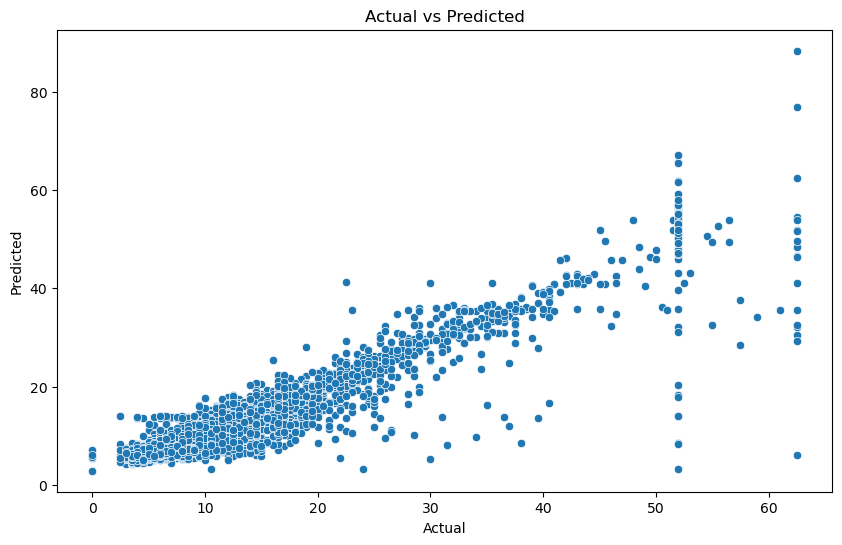

In [94]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize=(10,6))
sns.scatterplot(results, x='actual',y='predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Visualize the distribution of the `residuals` using a histogram.

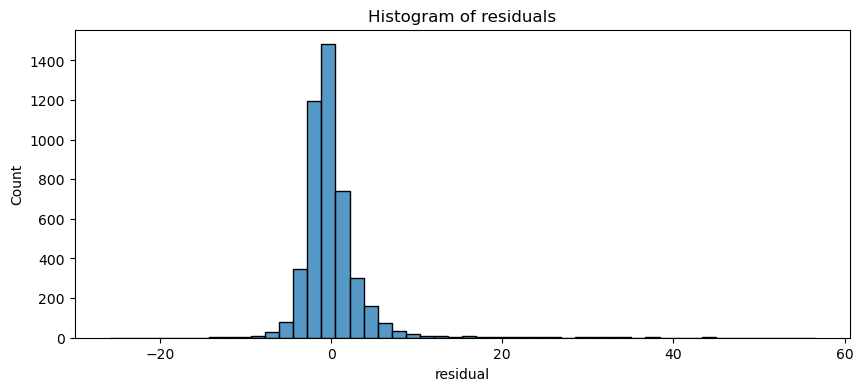

In [95]:
# Visualize the distribution of the `residuals`
plt.figure(figsize=(10,4))
sns.histplot(results['residual'], bins=50)
plt.title('Histogram of residuals')
plt.show()

In [96]:
# Calculate residual mean
residual_mean = results['residual'].mean()
residual_mean

-0.01518199471779662

The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

Create a scatterplot of `residuals` over `predicted`.

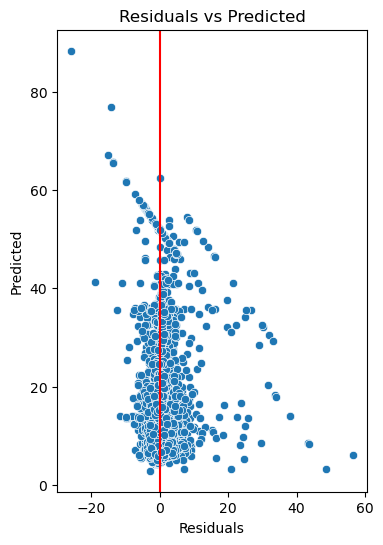

In [97]:
# Create a scatterplot of `residuals` over `predicted`
plt.figure(figsize=(4,6))
sns.scatterplot(results, x='residual',y='predicted')
plt.title('Residuals vs Predicted')
plt.xlabel('Residuals')
plt.ylabel('Predicted')
plt.axvline(0, c='red')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines, which we know are the imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips.

### Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [98]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.031544,7.135758,2.811583,0.121491,-0.054611


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of \\$7.13. This is incorrect. Remember, the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \\$7.13. 

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data). 

1. Calculate the standard deviation of `mean_distance` in the `X_train` data.

2. Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

### NOTES

There are some things to note that differ from best practice or from how tasks are typically performed.

1.  When the `mean_distance` and `mean_duration` columns were computed, the means were calculated from the entire dataset. These same columns were then used to train a model that was used to predict on a test set. A test set is supposed to represent entirely new data that the model has not seen before, but in this case, some of its predictor variables were derived using data that *was* in the test set.</br></br>
This is known as **<u>data leakage</u>**. Data leakage is when information from your training data contaminates the test data. If your model has unexpectedly high scores, there is a good chance that there was some data leakage.
</br></br>
To avoid data leakage in this modeling process, it would be best to compute the means using only the training set and then copy those into the test set, thus preventing values from the test set from being included in the computation of the means. This would have created some problems because it's very likely that some combinations of pickup-dropoff locations would only appear in the test data (not the train data). This means that there would be NaNs in the test data, and further steps would be required to address this.
</br></br>
In this case, the data leakage improved the R<sup>2</sup> score by ~0.03.

# Build a machine learning model (Part 5)

The New York City TLC was impressed with the work and has requested that the we build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

#### **There are ethical implications to this model!!**

Drivers who didn't receive tips will probably be upset that the app told them a customer would leave a tip. If it happened often, drivers might not trust the app.
Drivers are unlikely to pick up people who are predicted to not leave tips. Customers will have difficulty finding a taxi that will pick them up, and might get angry at the taxi company. Even when the model is correct, people who can't afford to tip will find it more difficult to get taxis, which limits the accessibility of taxi service to those who pay extra.

That said, the creation os such model can effectively limit equal access to taxis is ethically problematic, and carries a lot of risk. It's not good to disincentivize drivers from picking up customers. It could also cause a customer backlash. The problems seem to outweigh the benefits.

We can instead build a model that predicts the most generous customers. This could accomplish the goal of helping taxi drivers increase their earnings from tips while preventing the wrongful exclusion of certain people from using taxis. Instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will **tip 20% or more**? 

The ideal features needed to make this prediction will most likely be the behavioral history for each customer, so we could know how much they tipped on previous taxi rides. We'd also want times, dates, and locations of both pickups and dropoffs, estimated fares, and payment method.

The target variable would be a binary variable (1 or 0) that indicates whether or not the customer is expected to tip ≥ 20%.

This is a supervised learning, classification task. We could use accuracy, precision, recall, F-score, area under the ROC curve, or a number of other metrics. However, we don't have enough information at this time to know which are most appropriate. We need to know the class balance of the target variable.

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [99]:
# Import packages and libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,\
recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

In [100]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Since we are changing the model we will build, it's better if we upload two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares we predicted above.

In [101]:
url_original_data = '/Users/andrerodrigues/Documents/Google Advanced Data Analytics Professional Certificate/Automatidata/Automatidata Files Course 2/home/jovyan/work/2017_Yellow_Taxi_Trip_Data.csv'
url_nyc_preds_means = '/Users/andrerodrigues/Documents/Google Advanced Data Analytics Professional Certificate/Automatidata/Automatidata Files Course 6/home/jovyan/work/nyc_preds_means.csv'

In [102]:
# Load dataset into dataframe
df3 = pd.read_csv(url_original_data)

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv(url_nyc_preds_means)

Inspect the first few rows of `nyc_preds_means`.

In [103]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


Let's join the two dataframes using a method of your choice.

In [104]:
# Merge datasets
df3 = df3.merge(nyc_preds_means, left_index=True, right_index=True)
df3.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


### **Feature engineering**

In [105]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

We know from the EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, we'll need to sample the data to select only the customers who pay with credit card. 

In [106]:
# Subset the data to isolate only customers who paid by credit card
df3 = df3[df3['payment_type']==1]
df3.shape

(15265, 21)

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what we need to create the target variable. We'll have to engineer it. 

Let's add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous. 

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system. 

In [107]:
# Create tip % col
tip_result = df3['tip_amount'] / (df3['total_amount'] - df3['tip_amount'])
df3['tip_percent'] = round(tip_result, 3)

Now let's create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [108]:
# Create 'generous' col (target)
df3['generous'] = df3['tip_percent']
df3['generous'] = df3['generous'] >= 0.20
df3['generous'] = df3['generous'].astype(int)
df3[['tip_amount','generous']].head()

,tip_amount,generous
0,2.76,1
1,4.00,1
2,1.45,0
3,6.39,1
5,2.06,1


We need to once again make the conversions we did earlier, as well as all the modifications to the dataframe:

* Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.
* Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.
* Create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [109]:
# Convert pickup and dropoff cols to datetime
df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
df3['tpep_dropoff_datetime'] = pd.to_datetime(df3['tpep_dropoff_datetime'])      

# Create a 'day' col
df3['day'] = df3['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df3['month'] = df3['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create time of day columns

Next, let's engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, let's first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [110]:
# Create 'am_rush' col
df3['am_rush'] = df3['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df3['daytime'] = df3['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df3['pm_rush'] = df3['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df3['nighttime'] = df3['tpep_pickup_datetime'].dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [111]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [112]:
# Apply 'am_rush' function to the 'am_rush' series
df3['am_rush'] = df3.apply(am_rush,axis=1)
df3[['am_rush']].head()

,am_rush
0,1
1,0
2,1
3,0
5,0


Write functions to convert the three remaining columns and apply them to their respective series.

In [113]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [114]:
# Apply 'daytime()' function to the 'daytime' series
df3['daytime'] = df3.apply(daytime, axis=1)

# Apply 'pm_rush()' function to the 'pm_rush' series
df3['pm_rush'] = df3.apply(pm_rush, axis=1)

# Apply 'nighttime' function to the 'nighttime' series
df3['nighttime'] = df3.apply(nighttime, axis=1)

Examine the first five rows of your dataframe.

In [115]:
df3[['tpep_pickup_datetime','day','month','am_rush','daytime','pm_rush','nighttime']].head()

,tpep_pickup_datetime,day,month,am_rush,daytime,pm_rush,nighttime
0,2017-03-25 08:55:43,saturday,mar,1,0,0,0
1,2017-04-11 14:53:28,tuesday,apr,0,1,0,0
2,2017-12-15 07:26:56,friday,dec,1,0,0,0
3,2017-05-07 13:17:59,sunday,may,0,1,0,0
5,2017-03-25 20:34:11,saturday,mar,0,0,0,1


#### Drop columns

Once again, we have to drop redundant and irrelevant columns as well as those that **would not be available when the model is deployed.** This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [116]:
# Drop columns
drop_columns = ['payment_type','trip_distance','tip_percent','total_amount',
                'tolls_amount','tpep_dropoff_datetime','tpep_pickup_datetime',
               'store_and_fwd_flag','improvement_surcharge','Unnamed: 0','fare_amount',
               'extra','mta_tax','tip_amount']

df3 = df3.drop(columns=drop_columns)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  month            15265 non-null  object 
 11  am_rush          15265 non-null  int64  
 12  daytime          15265 non-null  int64  
 13  pm_rush          15265 non-null  int64  
 14  nighttime        15265 non-null  int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, we'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [117]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID','PULocationID','DOLocationID']

# 2. Convert each column to string
for col in cols_to_str:
    df3[col] = df3[col].astype(str)

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [118]:
# Convert categoricals to binary
df4 = pd.get_dummies(df3,drop_first=True)
df4.head()

,VendorID,passenger_count,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLocationID_231,DOLocationID_232,DO

In [119]:
df4.shape

(15265, 347)

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [120]:
# Get class balance of 'generous' col
df4['generous'].value_counts(normalize=True)

generous
1    0.526368
0    0.473632
Name: proportion, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. We want to help taxi drivers make more money, but you don't want this to anger customers. Our metric should weigh both precision and recall equally. For thar reason, the metric with the most importance should be F1-score, which places equal weight on True Positives and False Positives, and so, on precision and recall.**

### **Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [124]:
# Isolate target variable (y)
y = df4['generous']

# Isolate the features (X)
X = df4.copy()
X = X.drop(columns='generous',axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [138]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth':[None],
             'max_features':[1.0],
             'max_samples':[0.7],
             'min_samples_leaf':[1,2],
             'min_samples_split':[2,5],
             'n_estimators':[300]
            }

# 3. Define a set of scoring metrics to capture
scoring = ['precision','recall','f1', 'accuracy']

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=4, refit='f1')

Now let's fit the model to the training data. Note that, depending on how many options we include in our search grid and the number of cross-validation folds we select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [139]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 6min 31s, sys: 1.37 s, total: 6min 32s
Wall time: 6min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [300]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'])

We can use `pickle` to save our models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [127]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [128]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [129]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examine the best average score across all the validation folds. 

In [140]:
# Examine best score
rf1.best_score_

0.7251450968681152

Examine the best combination of hyperparameters.

In [141]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [142]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [144]:
make_results('Random Forest CV',rf1,'f1')

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.681963,0.774424,0.725145,0.691123


Our results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. 

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, we can consider trying [4, 5, 6] this time.


Let's use our model to predict on the test data. Assign the results to a variable called `rf_preds`.

The benefit of using multiple models to predict on the test data is that you can compare models using data that was not used to train/tune hyperparameters. This reduces the risk of selecting a model based on how well it fit the training data.

The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, you no longer have a truly unbiased idea of how your model would be expected to perform on new data. In this case, think of final model selection as another way of "tuning" your model.

In [146]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [145]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [162]:
 # Get scores on test data
rf_test_scores = get_test_scores('Random Forest Test', rf_preds, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,Random Forest Test,0.679459,0.782203,0.72722,0.691123


**Question:** How do your test results compare to your validation results?

In [149]:
results = make_results('Random Forest CV',rf1,'f1')
results = pd.concat([results,rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.681963,0.774424,0.725145,0.691123
0,Random Forest CV Test,0.679459,0.782203,0.727220,0.691123


There is an increase in both F1 score and recall. The accuracy remains identical, and we notice a slight decrease in precision.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [150]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic',random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth':[8],
            'min_child_weight':[2],
            'learning_rate':[0.1,0.01,0.001],
            'n_estimators':[300],
            }

# 3. Define a set of scoring metrics to capture
scoring = ['precision','recall','f1','accuracy']

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(estimator=xgb, param_grid=cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [151]:
%%time
xgb1.fit(X_train,y_train)

CPU times: user 11min 44s, sys: 29.4 s, total: 12min 13s
Wall time: 1min 40s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [300]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'])

Get the best score from this model.

In [152]:
# Examine best score
xgb1.best_score_

0.7423019866852973

And the best parameters.

In [154]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 300}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [155]:
# Call 'make_results()' on the GridSearch object
results_xgb = make_results('XGBoost CV', xgb1, 'f1')
results_xgb

,model,precision,recall,F1,accuracy
0,XGBoost CV,0.691913,0.800716,0.742302,0.707419


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

In [156]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [157]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGBoost Test', xgb_preds, y_test)
xgb_test_scores     

,model,precision,recall,F1,accuracy
0,XGBoost Test,0.682863,0.813317,0.742403,0.702915


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

In [163]:
results = pd.concat([results,results_xgb,xgb_test_scores],axis=0)
results = results.drop_duplicates(keep='last')
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.681963,0.774424,0.725145,0.691123
0,Random Forest CV Test,0.679459,0.782203,0.727220,0.691123
0,XGBoost CV,0.691913,0.800716,0.742302,0.707419
0,XGBoost Test,0.682863,0.813317,0.742403,0.702915


he F<sub>1</sub> score is ~0.02 lower than the XGBoost model. Both models are acceptable, but the XGBoost model is the champion.

Let's plot a confusion matrix of the model's predictions on the test data.

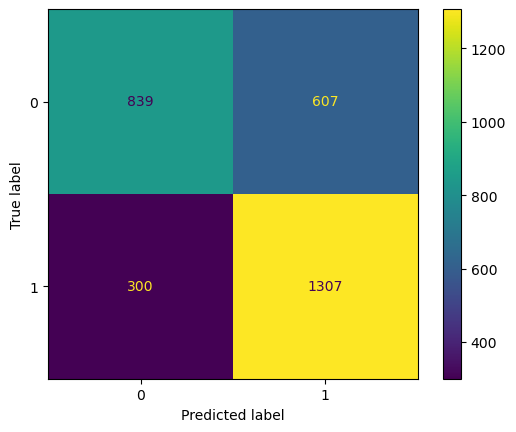

In [165]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb1.classes_)
disp.plot()
plt.show()

The most common error on our model are of the type 1 (false positives). Which means more customers will be labeled as generous when they are not. This will upset drivers more than customers.

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

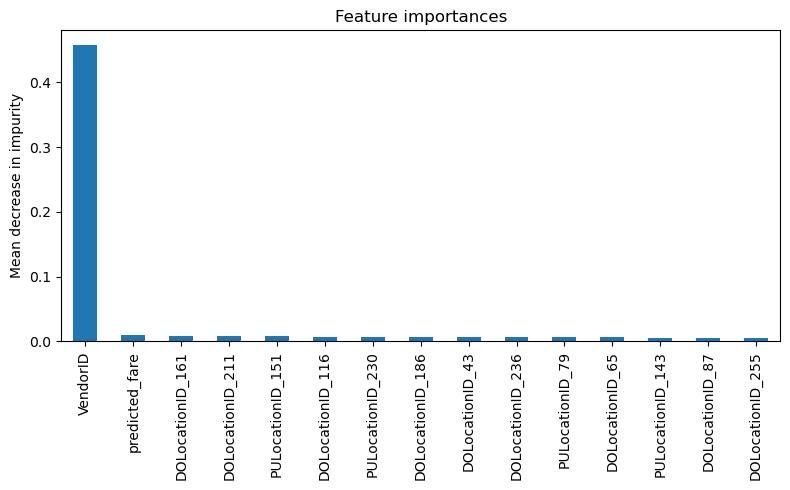

In [166]:
importances = xgb1.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

In the case of the random forest model, the feature importance is much different:

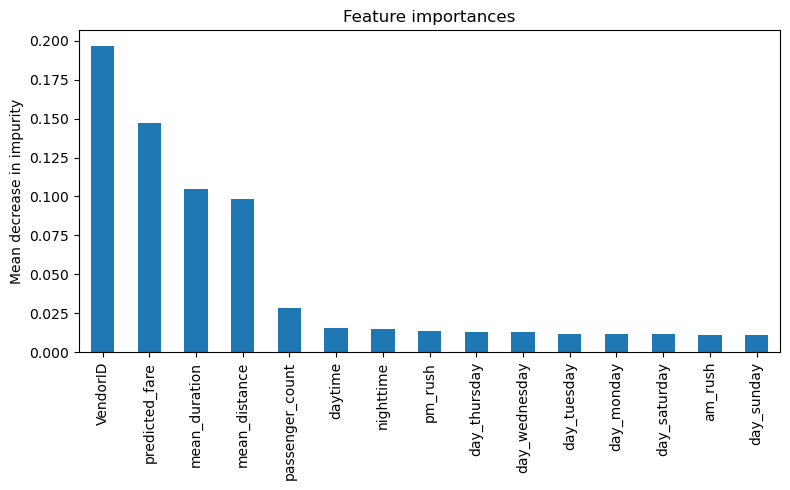

In [167]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

### **Conclusion**

1. **Should we recommend using this model? Why or why not?**  

2. **What was our model doing? Can we explain how it was making predictions?**   

3. **Are there new features that we can engineer that might improve model performance?**   

4. **What features would we like to have that would likely improve the performance of the model?**   


Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.

1. **Would you recommend using this model? Why or why not?**  
Yes, this is model performs acceptably. Its F<sub>1</sub> score was 0.7424 and it had an overall accuracy of 0.7029. It correctly identified ~81% of the actual responders in the test set, which is way better than a random guess. It may be worthwhile to test the model with a select group of taxi drivers to get feedback before deploying to full scale.  


2. **What was your highest scoring model doing? Can you explain how it was making predictions?**   
Unfortunately, XGBoost is not the most transparent machine learning algorithm. We know that `VendorID`is the most predictive feature, but we don't know how it influences tipping. This would require further exploration. This seems to indicate that one of the two vendors tends to attract more generous customers. It may be worth performing statistical tests on the different vendors to examine this further.  


3. **Are there new features that you can engineer that might improve model performance?**  
There are almost always additional features that can be engineered, but hopefully the most obvious ones were generated during the first round of modeling. In our case, we could try creating three new columns that indicate if the trip distance is short, medium, or far.

4. **What features would you want to have that would likely improve the performance of your model?**   
It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash, since it it absent from the dataset.